In [1]:
import pandas as pd     #For general purpose Data Manipulation
import numpy as np  #For some operations - creating vectors and matrices/log transformation
from matplotlib import pyplot as plt #Plotting Box-Whisker --> Outlier Detection
import seaborn as sns  #Plotting Box-Whisker and others
from sklearn.model_selection import train_test_split  #For Building Train and Test Set
from sklearn.linear_model import LinearRegression    #For Regression Analysis
from missingpy import KNNImputer # Misisng Value imputaion
from sklearn.metrics import mean_squared_error # for checking Error of the data set
from sklearn.metrics import r2_score # For checking Accuracy of the model

# Importing the Data Set

In [2]:
sales=pd.read_csv('Train.csv')
sales.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


# Checking info of sales data

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# Checking statistical information of the sales data set

In [4]:
sales.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          

# Checking Histogram of numerical columns to check the distribution of data set

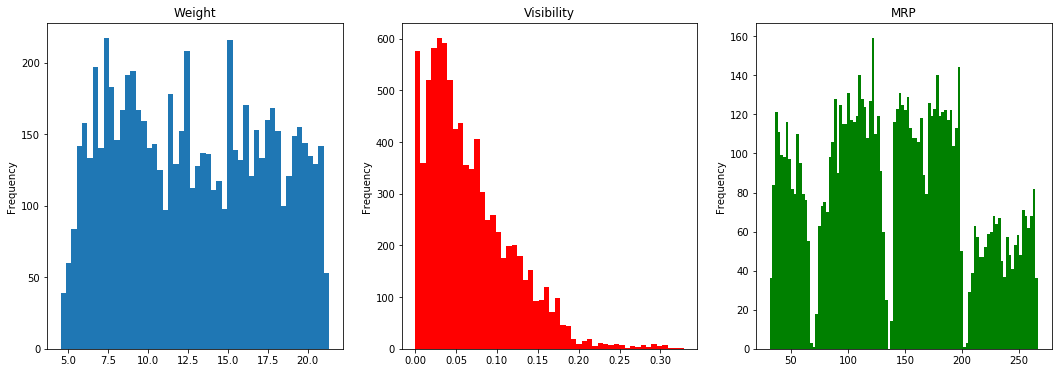

In [5]:
plt.figure(1)
plt.subplot(131)
sales.Item_Weight.plot(kind='hist',bins=50,figsize=(18,6),title='Weight')
plt.subplot(132)
sales.Item_Visibility.plot(kind='hist',bins=50,title='Visibility',color='r')
plt.subplot(133)
sales.Item_MRP.plot(kind='hist',bins=100,title='MRP',color='g')

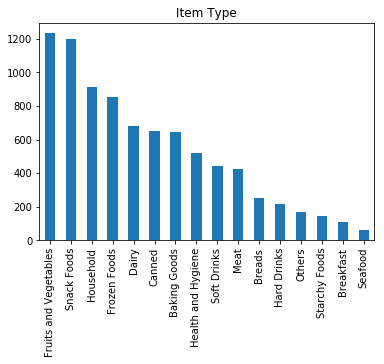

In [6]:
# Cheking Item type
sales.Item_Type.value_counts().plot(kind='bar',title='Item Type')

# Checking Item_Fat columns

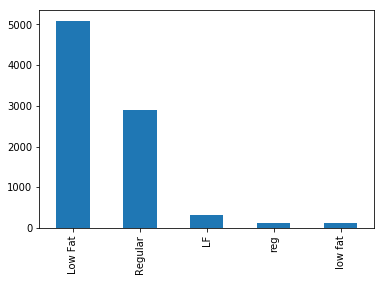

In [7]:
 sales.Item_Fat_Content.value_counts().plot(kind='bar')

# Checking Item_Fat columns for normalize their value into two catagory LF & RE

In [8]:
def replace_item(item):
    if (item == 'Low Fat'):
        return 'LF'
    elif (item == 'Regular'):
        return 'RE'
    elif item == 'low fat' :
        return 'LF'
    elif item == 'reg':
        return 'RE'
    elif item == 'LF':
        return 'LF'
    else :
        return 'OT'
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].apply(replace_item)
sales['Item_Fat_Content'].unique()

array(['LF', 'RE'], dtype=object)

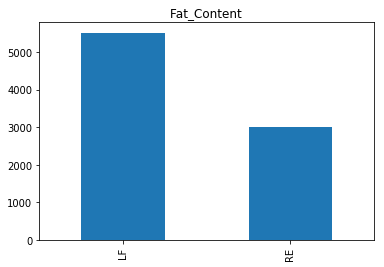

In [9]:
# Now Item_Fat_Content has only two columns
sales.Item_Fat_Content.value_counts().plot(kind='bar',title='Fat_Content')

In [10]:
# Droping Item_Identifier from sales dataset
sales.drop(['Item_Identifier'],axis=1,inplace=True)

In [11]:
sales

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,RE,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,RE,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Applying Lebel Encoding to change catagorical columns into Numerical columns

In [12]:
from sklearn.preprocessing import LabelEncoder
sales['Item_Type']=LabelEncoder().fit_transform(sales['Item_Type'])
sales['Item_Fat_Content']=LabelEncoder().fit_transform(sales['Item_Fat_Content'])
sales['Outlet_Identifier']=LabelEncoder().fit_transform(sales['Outlet_Identifier'])
sales['Outlet_Location_Type']=LabelEncoder().fit_transform(sales['Outlet_Location_Type'])
sales['Outlet_Type']=LabelEncoder().fit_transform(sales['Outlet_Type'])



 ### Outlet Size has NaN value so we need  to chnage outlet size data type into str to transfrom the columns

In [13]:
sales['Outlet_Size']=sales['Outlet_Size'].astype(str)
sales['Outlet_Size']=LabelEncoder().fit_transform(sales['Outlet_Size'])

In [14]:
#sales=sales.drop(['Item_Identifier'],axis=1,inplace=True)

In [15]:
# Applying the KNN imputation object on the column where we want to impute the Missing values
sales1= pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(sales))

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [16]:
 # Set Columns to new sales data
sales1.columns=sales.columns

# Checking Null Values

In [17]:

sales1.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Checking Skewness os the sales data to transfom the data set

In [18]:
sales1.skew()

Item_Weight                  0.093192
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Data set Normalisation

In [19]:
sales1['Item_Fat_Content']=np.cbrt(sales1['Item_Fat_Content'])
sales1['Item_Visibility']=np.sqrt(sales1['Item_Visibility'])
sales1['Outlet_Type']=np.cbrt(sales1['Outlet_Type'])
sales1['Item_Outlet_Sales']=np.cbrt(sales1['Item_Outlet_Sales'])

In [20]:

sales1.skew()

Item_Weight                  0.093192
Item_Fat_Content             0.616705
Item_Visibility             -0.098056
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                 -1.539224
Item_Outlet_Sales           -0.102507
dtype: float64

# Fitting Linear Regression

In [21]:
x=sales1.iloc[:,:-1]
y=sales1['Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [22]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_predict=regressor.predict(x_test)

print(y_predict)

[13.1679921  11.29559235  9.75663938 ... 14.31895399 12.66167298
  9.47738763]


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
print(rmse)
print(r2)

2.003833847374957
0.6994961545005616


# Fitting Ridge & Lasso 

In [24]:
from sklearn.linear_model import Ridge, Lasso

In [25]:
# Checking Range of Alpha on Ridge
alpha_range =[0.001,0.01,0.05,0.5,5]

for a in alpha_range:
    ridgereg = Ridge(alpha = a, normalize=True)
    ridgereg.fit(x_train,y_train)
    y_predict = ridgereg.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test,y_predict))
    r2 = r2_score(y_test,y_predict)
    print("Alpha is ", a)
    print("RMSE is ",rmse)
    print("R2 score is ",r2)

Alpha is  0.001
RMSE is  2.0041658823337496
R2 score is  0.6993965593682909
Alpha is  0.01
RMSE is  2.0076076940462
R2 score is  0.6983632029544145
Alpha is  0.05
RMSE is  2.0283202712972996
R2 score is  0.6921070959958278
Alpha is  0.5
RMSE is  2.3047882781767726
R2 score is  0.602452807547846
Alpha is  5
RMSE is  3.2192965569266487
R2 score is  0.22438073451020502


In [26]:
# Checking Range of Alpha on Lasso
alpha_range =[0.001,0.01,0.05,0.5,5]

for a in alpha_range:
    lassoreg = Lasso(alpha=a)
    lassoreg.fit(x_train,y_train)
    y_predict = lassoreg.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test,y_predict))
    r2 = r2_score(y_test,y_predict)
    print("Alpha is ", a)
    print("RMSE is ",rmse)
    print("R2 score is ",r2)

Alpha is  0.001
RMSE is  2.004389260417407
R2 score is  0.6993295469885606
Alpha is  0.01
RMSE is  2.0098425942214946
R2 score is  0.6976912555838564
Alpha is  0.05
RMSE is  2.039670776671304
R2 score is  0.688651509207631
Alpha is  0.5
RMSE is  2.493169952281721
R2 score is  0.5348099832302785
Alpha is  5
RMSE is  3.0260442384405914
R2 score is  0.31470563100081506


# Applying Ridge and Lasso Regression has no effect on the r^2 score

In [27]:
predictors = x_train.columns # To save list of col headers in a variable
print(predictors)

coef = pd.Series(regressor.coef_, predictors).sort_values()  # for viewing effect of each column in series format
print(coef)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Outlet_Location_Type        -0.470833
Item_Visibility             -0.400352
Outlet_Establishment_Year   -0.052639
Outlet_Identifier           -0.044925
Item_Type                    0.001129
Item_Weight                  0.001411
Item_MRP                     0.031454
Item_Fat_Content             0.101893
Outlet_Size                  0.342476
Outlet_Type                  6.160995
dtype: float64


### The Independent Variables "Item_Visibility", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type" have the most significant impact on the model

Text(0.5, 1.0, 'Residual Plot')

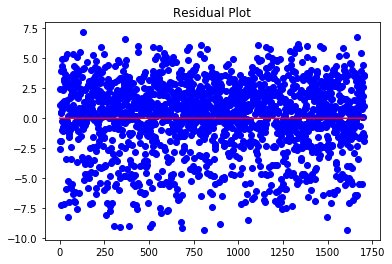

In [28]:
#Residual plot
x=[i for i in range(1,len(y_predict)+1)]
x_plot=plt.scatter(x,(y_test-y_predict),c="b")
plt.plot(x,[0]*len(y_predict),c='r')
plt.title('Residual Plot')

# Loading the Test.csv and predicting the outlet Sales

In [29]:
test_data = pd.read_csv("Test.csv")

In [30]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

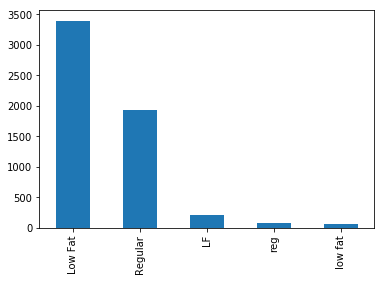

In [31]:
# Checking Item_Fat columns
test_data.Item_Fat_Content.value_counts().plot(kind='bar')

In [32]:
# Checking Item_Fat columns for normalize their value into two catagory LF & RE
def replace_item(item):
    if (item == 'Low Fat'):
        return 'LF'
    elif (item == 'Regular'):
        return 'RE'
    elif item == 'low fat' :
        return 'LF'
    elif item == 'reg':
        return 'RE'
    elif item == 'LF':
        return 'LF'
    else :
        return 'OT'
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].apply(replace_item)
test_data['Item_Fat_Content'].unique()

array(['LF', 'RE'], dtype=object)

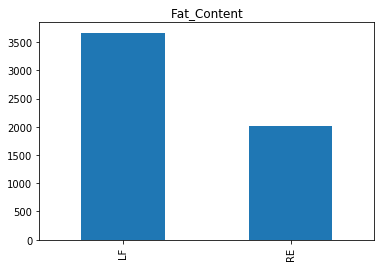

In [33]:
test_data.Item_Fat_Content.value_counts().plot(kind='bar',title='Fat_Content')

In [34]:
test_data.drop(['Item_Identifier'],axis=1,inplace=True)

In [35]:
test_data['Item_Type']=LabelEncoder().fit_transform(test_data['Item_Type'])
test_data['Item_Fat_Content']=LabelEncoder().fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Identifier']=LabelEncoder().fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Location_Type']=LabelEncoder().fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type']=LabelEncoder().fit_transform(test_data['Outlet_Type'])

In [36]:
test_data['Outlet_Size']=test_data['Outlet_Size'].astype(str)
test_data['Outlet_Size']=LabelEncoder().fit_transform(test_data['Outlet_Size'])

In [37]:
# Applying the imputation object on the column where we want to impute the Missing value
test_data1= pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(test_data))

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


In [38]:
# Naming the Columns on new test data after KNN imputation
test_data1.columns=test_data.columns

# Predicted Dependent Variable

In [39]:
prediction = regressor.predict(test_data1)

In [40]:
test_data1["Predicted_Outlet_Sales"] = prediction

# Predicted Outlet Sales

In [41]:
test_data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Outlet_Sales
0,20.750,0.0,0.007565,13.0,107.8622,9.0,1999.0,1.0,0.0,1.0,11.342182
1,8.300,1.0,0.038428,4.0,87.3198,2.0,2007.0,3.0,1.0,1.0,10.865325
2,14.600,0.0,0.099575,11.0,241.7538,0.0,1998.0,3.0,2.0,0.0,9.545139
3,7.315,0.0,0.015388,13.0,155.0340,2.0,2007.0,3.0,1.0,1.0,12.911332
4,14.141,1.0,0.118599,4.0,234.2300,5.0,1985.0,1.0,2.0,3.0,27.651918
